In [221]:
import pandas as pd

data = pd.read_csv('weather_data_danang.csv')
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,showers,snow_depth,weather_code,cloud_cover,wind_speed_10m
0,2024-01-01T00:00,23.0,89,21.1,1015.0,0.0,0.0,0.0,3,98,3.3
1,2024-01-01T01:00,22.5,92,21.0,1014.7,0.0,0.0,0.0,3,100,1.8
2,2024-01-01T02:00,22.4,92,21.0,1014.0,0.1,0.0,0.0,51,100,2.1
3,2024-01-01T03:00,22.6,90,20.9,1013.6,0.1,0.0,0.0,51,100,2.4
4,2024-01-01T04:00,22.5,90,20.8,1013.4,0.1,0.0,0.0,51,98,3.4


In [222]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'showers', 'snow_depth', 'weather_code',
       'cloud_cover', 'wind_speed_10m'],
      dtype='object')

STT,Tên cột,Ý nghĩa,Đơn vị thường dùng

1,time,Thời gian ghi nhận dữ liệu,ISO 8601 (Ngày/Giờ)

2,temperature_2m, Nhiệt độ không khí tại độ cao 2m so với mặt đất,°C hoặc °F

3,relative_humidity_2m, Độ ẩm tương đối (lượng hơi nước hiện có so với mức bão hòa),%

4,dew_point_2m, Điểm sương (nhiệt độ mà tại đó hơi nước ngưng tụ thành nước),°C hoặc °F

5,surface_pressure, Áp suất khí quyển tại bề mặt,hPa hoặc mbar

6,rain,     "Lượng mưa ổn định (diện rộng, kéo dài)",mm

7,showers,  "Mưa rào (mưa cục bộ, cường độ mạnh, nhanh)",mm

8,snow_depth,   Độ dày lớp tuyết bao phủ trên mặt đất,cm hoặc m

9,weather_code, Mã trạng thái thời tiết (Theo chuẩn WMO),Số nguyên (Integer)

10,cloud_cover, Tổng lượng mây che phủ bầu trời,%

11,wind_speed_10m,  Tốc độ gió tại độ cao tiêu chuẩn 10m,km/h hoặc m/s

In [223]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].isnull().sum()}")

time: 0
temperature_2m: 0
relative_humidity_2m: 0
dew_point_2m: 0
surface_pressure: 0
rain: 0
showers: 0
snow_depth: 0
weather_code: 0
cloud_cover: 0
wind_speed_10m: 0


In [224]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].value_counts()}")

time: time
2024-01-01T00:00    1
2024-01-01T01:00    1
2024-01-01T02:00    1
2024-01-01T03:00    1
2024-01-01T04:00    1
                   ..
2026-01-01T19:00    1
2026-01-01T20:00    1
2026-01-01T21:00    1
2026-01-01T22:00    1
2026-01-01T23:00    1
Name: count, Length: 17568, dtype: int64
temperature_2m: temperature_2m
25.5    307
25.0    299
27.0    295
24.5    288
26.0    270
       ... 
39.2      1
39.9      1
38.7      1
40.2      1
38.4      1
Name: count, Length: 233, dtype: int64
relative_humidity_2m: relative_humidity_2m
93    830
94    821
91    811
92    796
90    792
     ... 
34      4
33      3
31      2
35      1
32      1
Name: count, Length: 70, dtype: int64
dew_point_2m: dew_point_2m
24.5    546
25.0    532
24.0    530
23.5    435
24.6    419
       ... 
28.3      1
13.7      1
11.0      1
12.8      1
11.8      1
Name: count, Length: 163, dtype: int64
surface_pressure: surface_pressure
1004.5    136
1006.2    133
1006.4    132
1004.7    132
1004.8    132
         .

In [225]:
for i in range(len(data.columns)):
    print(f"{data.columns[i]}: {data[data.columns[i]].unique()}")

time: ['2024-01-01T00:00' '2024-01-01T01:00' '2024-01-01T02:00' ...
 '2026-01-01T21:00' '2026-01-01T22:00' '2026-01-01T23:00']
temperature_2m: [23.  22.5 22.4 22.6 22.9 21.6 23.5 23.9 24.8 25.2 25.3 25.1 24.7 24.2
 23.4 22.7 23.1 22.8 23.2 23.8 24.  24.5 23.3 21.9 21.5 22.3 24.9 23.6
 22.1 22.  21.8 21.  21.1 20.8 20.9 20.6 21.4 24.3 25.  24.4 22.2 21.2
 20.4 19.9 19.3 19.8 19.6 21.7 20.7 23.7 24.1 24.6 21.3 20.1 20.  19.5
 18.8 19.  20.2 25.6 25.9 25.8 25.4 25.5 20.5 19.7 19.4 19.2 19.1 18.9
 18.4 18.1 17.6 20.3 18.7 26.3 26.2 26.  26.1 26.6 26.8 26.5 27.4 27.
 26.4 26.9 26.7 27.2 27.1 27.5 28.4 28.1 27.8 28.  28.5 28.6 27.7 25.7
 27.9 27.6 29.8 31.8 32.  31.1 28.9 28.7 31.7 33.5 33.7 33.  30.5 29.2
 28.3 27.3 28.8 28.2 29.  29.4 29.5 29.1 29.3 30.  30.1 30.3 29.7 30.7
 31.6 32.6 32.7 32.3 31.5 30.8 29.9 30.6 34.3 31.9 31.2 30.2 32.8 34.
 29.6 31.  32.5 32.2 31.4 32.1 31.3 30.4 30.9 32.4 33.8 34.5 33.6 32.9
 35.7 33.3 33.2 35.2 34.6 33.9 36.1 36.5 37.9 38.3 37.1 36.  34.8 34.2
 33.1 3

In [226]:
data = data.drop(columns=['showers', 'snow_depth'])

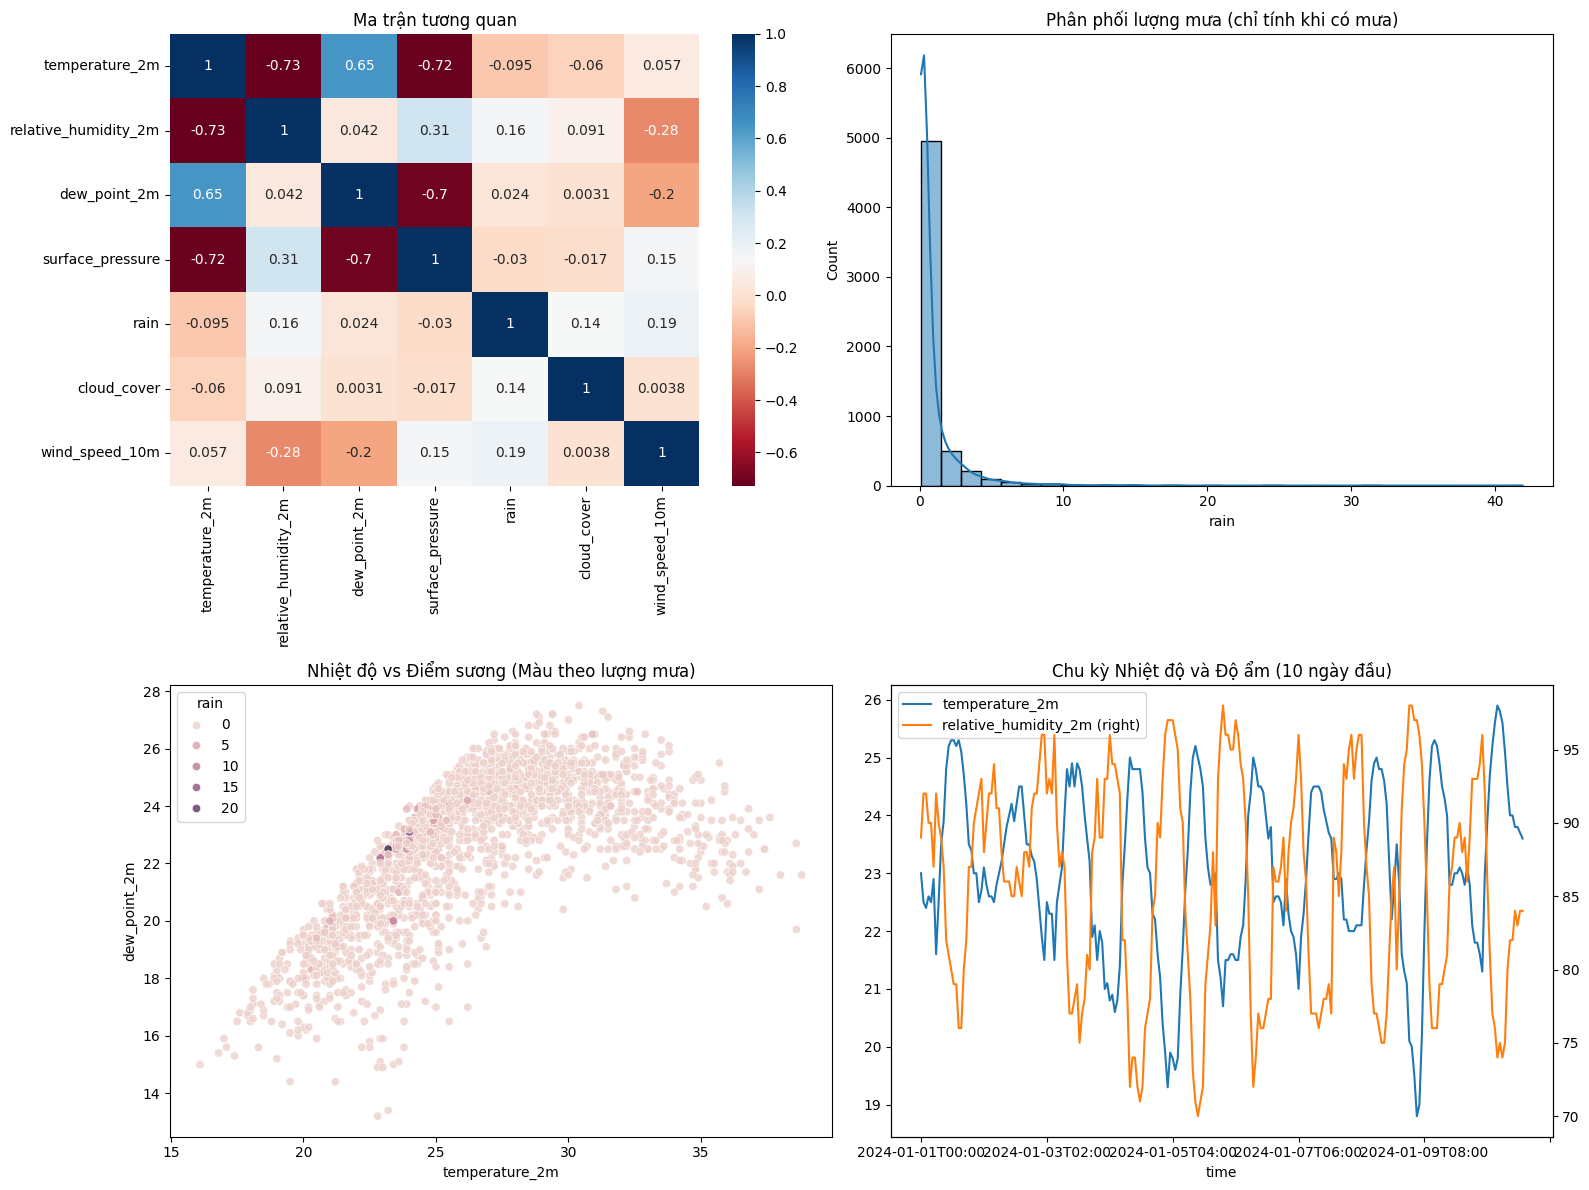

In [227]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axes = plt.subplots(2, 2, figsize=(16, 12))

cols_to_viz = ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'rain', 'cloud_cover', 'wind_speed_10m']
sns.heatmap(data[cols_to_viz].corr(), annot=True, cmap='RdBu', ax=axes[0,0])
axes[0,0].set_title("Ma trận tương quan")

sns.histplot(data[data['rain'] > 0]['rain'], bins=30, kde=True, ax=axes[0,1])
axes[0,1].set_title("Phân phối lượng mưa (chỉ tính khi có mưa)")

# 3. Quan hệ Temp vs Dew Point
sns.scatterplot(data=data.sample(2000), x='temperature_2m', y='dew_point_2m', hue='rain', ax=axes[1,0], alpha=0.8)
axes[1,0].set_title("Nhiệt độ vs Điểm sương (Màu theo lượng mưa)")

data[:240].plot(x='time', y=['temperature_2m', 'relative_humidity_2m'], secondary_y='relative_humidity_2m', ax=axes[1,1])
axes[1,1].set_title("Chu kỳ Nhiệt độ và Độ ẩm (10 ngày đầu)")

plt.tight_layout()
plt.show()

In [228]:
data['time'] = pd.to_datetime(data['time'])
data['hour'] = data['time'].dt.hour
data['month'] = data['time'].dt.month
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,month
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,3,98,3.3,0,1
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,3,100,1.8,1,1
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,51,100,2.1,2,1
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,51,100,2.4,3,1
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,51,98,3.4,4,1


In [229]:
data['weather_code'].value_counts()

weather_code
3     7187
51    3705
0     1871
1     1453
2     1160
53     887
61     518
63     455
55     250
65      82
Name: count, dtype: int64

In [230]:
data.groupby('weather_code')['rain'].mean()

weather_code
0      0.000000
1      0.000000
2      0.000000
3      0.000000
51     0.187530
53     0.656257
55     1.094400
61     1.775676
63     3.978462
65    13.167073
Name: rain, dtype: float64

In [231]:
def group_weather(code):
    if code <= 3: return 'Cloudy'
    if code <= 55: return 'Drizzle'
    if code <= 65: return 'Rain'

data['weather_group'] = data['weather_code'].apply(group_weather)
data.head()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,hour,month,weather_group
0,2024-01-01 00:00:00,23.0,89,21.1,1015.0,0.0,3,98,3.3,0,1,Cloudy
1,2024-01-01 01:00:00,22.5,92,21.0,1014.7,0.0,3,100,1.8,1,1,Cloudy
2,2024-01-01 02:00:00,22.4,92,21.0,1014.0,0.1,51,100,2.1,2,1,Drizzle
3,2024-01-01 03:00:00,22.6,90,20.9,1013.6,0.1,51,100,2.4,3,1,Drizzle
4,2024-01-01 04:00:00,22.5,90,20.8,1013.4,0.1,51,98,3.4,4,1,Drizzle


In [232]:
data['weather_group'].value_counts()

weather_group
Cloudy     11671
Drizzle     4842
Rain        1055
Name: count, dtype: int64

In [233]:
# Tạo khung thời gian chuẩn
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')

# Tìm các thời điểm có trong chuẩn nhưng không có trong dữ liệu của bạn
missing_times = expected_range.difference(data['time'])
print(f"Số lượng giờ bị thiếu: {len(missing_times)}")
print("Một số giờ bị thiếu đầu tiên:", missing_times[:5])

Số lượng giờ bị thiếu: 0
Một số giờ bị thiếu đầu tiên: DatetimeIndex([], dtype='datetime64[ns]', freq='h')


C:\Users\Danh\AppData\Local\Temp\ipykernel_8780\2383751855.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


In [234]:
data['time'] = pd.to_datetime(data['time']).dt.floor('H')

# 2. Loại bỏ các dòng trùng lặp (nếu có)
original_len = len(data)
data = data.drop_duplicates(subset=['time'])
print(f"Đã loại bỏ {original_len - len(data)} dòng trùng lặp.")

# 3. Sắp xếp lại theo thứ tự thời gian tăng dần
data = data.sort_values('time').reset_index(drop=True)

# 4. Kiểm tra lại lần cuối
expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')
print(f"Khớp hoàn toàn: {len(expected_range) == len(data)}")

Đã loại bỏ 0 dòng trùng lặp.
Khớp hoàn toàn: True


C:\Users\Danh\AppData\Local\Temp\ipykernel_8780\3562711797.py:1: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data['time'] = pd.to_datetime(data['time']).dt.floor('H')
C:\Users\Danh\AppData\Local\Temp\ipykernel_8780\3562711797.py:12: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  expected_range = pd.date_range(start=data['time'].min(), end=data['time'].max(), freq='H')


Feature Engineering

In [235]:
for col in ['relative_humidity_2m']:
    data[f'{col}_lag1'] = data[col].shift(1)
    data[f'{col}_lag2'] = data[col].shift(2)

In [236]:
data['humidity_change'] = data['relative_humidity_2m'].diff(1)

In [237]:
import numpy as np
data['hour_sin'] = np.sin(2*np.pi*data['hour']/24)
data['hour_cos'] = np.cos(2*np.pi*data['hour']/24)

In [238]:
data.columns

Index(['time', 'temperature_2m', 'relative_humidity_2m', 'dew_point_2m',
       'surface_pressure', 'rain', 'weather_code', 'cloud_cover',
       'wind_speed_10m', 'hour', 'month', 'weather_group',
       'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2',
       'humidity_change', 'hour_sin', 'hour_cos'],
      dtype='object')

In [239]:
# Danh sách các cột cần loại bỏ khỏi X
drop_cols = ['time', 'rain', 'weather_code', 'weather_group','hour']

X = data.drop(columns=drop_cols)
y = data['weather_group'].astype('category').cat.codes # Chuyển nhãn chữ sang số

print("Danh sách các đặc trưng cuối cùng:", X.columns.tolist())

Danh sách các đặc trưng cuối cùng: ['temperature_2m', 'relative_humidity_2m', 'dew_point_2m', 'surface_pressure', 'cloud_cover', 'wind_speed_10m', 'month', 'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2', 'humidity_change', 'hour_sin', 'hour_cos']


In [240]:
X.dropna()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,month,relative_humidity_2m_lag1,relative_humidity_2m_lag2,humidity_change,hour_sin,hour_cos
2,22.4,92,21.0,1014.0,100,2.1,1,92.0,89.0,0.0,0.500000,8.660254e-01
3,22.6,90,20.9,1013.6,100,2.4,1,92.0,92.0,-2.0,0.707107,7.071068e-01
4,22.5,90,20.8,1013.4,98,3.4,1,90.0,92.0,0.0,0.866025,5.000000e-01
5,22.9,87,20.5,1013.9,99,3.3,1,90.0,90.0,-3.0,0.965926,2.588190e-01
6,21.6,92,20.2,1014.4,100,4.3,1,87.0,90.0,5.0,1.000000,6.123234e-17
...,...,...,...,...,...,...,...,...,...,...,...,...
17563,22.5,76,18.1,1014.6,85,9.3,1,76.0,70.0,0.0,-0.965926,2.588190e-01
17564,22.4,79,18.5,1015.3,65,3.6,1,76.0,76.0,3.0,-0.866025,5.000000e-01
17565,22.0,81,18.5,1015.9,27,4.2,1,79.0,76.0,2.0,-0.707107,7.071068e-01
17566,21.1,87,18.8,1016.0,16,4.4,1,81.0,79.0,6.0,-0.500000,8.660254e-01


In [241]:

# 2. Biến động áp suất trong 6 giờ (nhận diện bão xa)
data['pressure_trend_6h'] = data['surface_pressure'].diff(6)

# 4. Loại bỏ NaN sau khi tạo Feature
data.dropna(inplace=True)

In [242]:
data['month_sin'] = np.sin(2 * np.pi * data['month'] / 12)
data['month_cos'] = np.cos(2 * np.pi * data['month'] / 12)


In [243]:
cols_to_drop = [
    'hour', 'month',                                 # Đã có sin/cos
    'relative_humidity_2m_lag1', 'relative_humidity_2m_lag2'
]

data = data.drop(columns=cols_to_drop)

In [244]:
data.columns
len(data.columns)

16

In [245]:
data

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,weather_group,humidity_change,hour_sin,hour_cos,pressure_trend_6h,month_sin,month_cos
6,2024-01-01 06:00:00,21.6,92,20.2,1014.4,0.1,51,100,4.3,Drizzle,5.0,1.000000,6.123234e-17,-0.6,0.5,0.866025
7,2024-01-01 07:00:00,22.5,90,20.9,1014.9,0.3,51,100,2.9,Drizzle,-2.0,0.965926,-2.588190e-01,0.2,0.5,0.866025
8,2024-01-01 08:00:00,23.5,89,21.5,1016.3,0.1,51,98,5.6,Drizzle,-1.0,0.866025,-5.000000e-01,2.3,0.5,0.866025
9,2024-01-01 09:00:00,23.9,87,21.6,1016.5,0.2,51,83,6.4,Drizzle,-2.0,0.707107,-7.071068e-01,2.9,0.5,0.866025
10,2024-01-01 10:00:00,24.8,82,21.6,1016.1,0.1,51,93,9.2,Drizzle,-5.0,0.500000,-8.660254e-01,2.7,0.5,0.866025
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,2026-01-01 19:00:00,22.5,76,18.1,1014.6,0.0,3,85,9.3,Cloudy,0.0,-0.965926,2.588190e-01,1.7,0.5,0.866025
17564,2026-01-01 20:00:00,22.4,79,18.5,1015.3,0.0,2,65,3.6,Cloudy,3.0,-0.866025,5.000000e-01,2.8,0.5,0.866025
17565,2026-01-01 21:00:00,22.0,81,18.5,1015.9,0.0,1,27,4.2,Cloudy,2.0,-0.707107,7.071068e-01,3.4,0.5,0.866025
17566,2026-01-01 22:00:00,21.1,87,18.8,1016.0,0.0,0,16,4.4,Cloudy,6.0,-0.500000,8.660254e-01,3.4,0.5,0.866025


In [246]:
data.describe()

,time,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,rain,weather_code,cloud_cover,wind_speed_10m,humidity_change,hour_sin,hour_cos,pressure_trend_6h,month_sin,month_cos
count,17562,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,17562.000000,1.756200e+04,17562.000000,1.756200e+04,1.756200e+04
mean,2025-01-01 02:30:00,26.353325,81.299909,22.628755,1009.070601,0.305193,19.384637,77.911400,9.192119,0.000114,-0.000188,-2.447259e-04,0.000421,-3.672262e-03,-7.960803e-04
min,2024-01-01 06:00:00,16.100000,31.000000,11.000000,987.200000,0.000000,0.000000,0.000000,0.000000,-28.000000,-1.000000,-1.000000e+00,-9.100000,-1.000000e+00,-1.000000e+00
25%,2024-07-02 04:15:00,23.500000,74.000000,20.900000,1004.800000,0.000000,2.000000,60.000000,4.700000,-2.000000,-0.707107,-7.071068e-01,-1.800000,-8.660254e-01,-8.660254e-01
50%,2025-01-01 02:30:00,26.100000,85.000000,23.400000,1008.800000,0.000000,3.000000,99.000000,8.000000,0.000000,0.000000,-1.836970e-16,0.000000,-2.449294e-16,-1.836970e-16
75%,2025-07-03 00:45:00,28.800000,91.000000,24.600000,1013.400000,0.100000,51.000000,100.000000,12.600000,2.000000,0.707107,7.071068e-01,1.900000,5.000000e-01,8.660254e-01
max,2026-01-01 23:00:00,40.200000,100.000000,28.500000,1025.100000,41.900000,65.000000,100.000000,56.500000,31.000000,1.000000,1.000000e+00,7.500000,1.000000e+00,1.000000e+00
std,NaN,3.946357,12.619633,2.612722,5.516258,1.238142,24.365468,32.865843,5.740353,3.880863,0.707147,7.071067e-01,2.318609,7.057269e-01,7.085142e-01


In [247]:
data['press_std_12h'] = data['surface_pressure'].rolling(window=12).std()
    # Độ ẩm cực đại 6h (dấu hiệu tích tụ mây)
data['hum_max_6h'] = data['relative_humidity_2m'].rolling(window=6).max()
    # Biến động nhiệt độ 3h
data['temp_diff_3h'] = data['temperature_2m'].diff(3)
data.dropna(inplace=True)



In [248]:
drop_cols = ['time', 'rain', 'weather_code']
d = data.drop(drop_cols, axis=1)
len(d.columns)
d

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,weather_group,humidity_change,hour_sin,hour_cos,pressure_trend_6h,month_sin,month_cos,press_std_12h,hum_max_6h,temp_diff_3h
17,24.7,80,21.0,1013.3,96,10.4,Cloudy,4.0,-0.965926,-2.588190e-01,-2.2,0.5,0.866025,1.368808,80.0,-0.5
18,24.2,82,21.0,1013.6,87,6.8,Cloudy,2.0,-1.000000,-1.836970e-16,-1.3,0.5,0.866025,1.395990,82.0,-1.1
19,23.5,87,21.2,1014.1,40,5.3,Cloudy,5.0,-0.965926,2.588190e-01,0.1,0.5,0.866025,1.393383,87.0,-1.6
20,23.4,87,21.0,1015.3,83,5.6,Drizzle,0.0,-0.866025,5.000000e-01,2.1,0.5,0.866025,1.297083,87.0,-1.3
21,23.0,90,21.2,1015.4,86,5.9,Drizzle,3.0,-0.707107,7.071068e-01,2.7,0.5,0.866025,1.161862,90.0,-1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17563,22.5,76,18.1,1014.6,85,9.3,Cloudy,0.0,-0.965926,2.588190e-01,1.7,0.5,0.866025,0.929646,76.0,-2.5
17564,22.4,79,18.5,1015.3,65,3.6,Cloudy,3.0,-0.866025,5.000000e-01,2.8,0.5,0.866025,1.031621,79.0,-1.4
17565,22.0,81,18.5,1015.9,27,4.2,Cloudy,2.0,-0.707107,7.071068e-01,3.4,0.5,0.866025,1.165508,81.0,-0.9
17566,21.1,87,18.8,1016.0,16,4.4,Cloudy,6.0,-0.500000,8.660254e-01,3.4,0.5,0.866025,1.286174,87.0,-1.4


In [249]:
d.to_csv('preprocessed_data.csv', index=False)

In [250]:
f = pd.read_csv('preprocessed_data.csv')
f.head()

,temperature_2m,relative_humidity_2m,dew_point_2m,surface_pressure,cloud_cover,wind_speed_10m,weather_group,humidity_change,hour_sin,hour_cos,pressure_trend_6h,month_sin,month_cos,press_std_12h,hum_max_6h,temp_diff_3h
0,24.7,80,21.0,1013.3,96,10.4,Cloudy,4.0,-0.965926,-2.588190e-01,-2.2,0.5,0.866025,1.368808,80.0,-0.5
1,24.2,82,21.0,1013.6,87,6.8,Cloudy,2.0,-1.000000,-1.836970e-16,-1.3,0.5,0.866025,1.395990,82.0,-1.1
2,23.5,87,21.2,1014.1,40,5.3,Cloudy,5.0,-0.965926,2.588190e-01,0.1,0.5,0.866025,1.393383,87.0,-1.6
3,23.4,87,21.0,1015.3,83,5.6,Drizzle,0.0,-0.866025,5.000000e-01,2.1,0.5,0.866025,1.297083,87.0,-1.3
4,23.0,90,21.2,1015.4,86,5.9,Drizzle,3.0,-0.707107,7.071068e-01,2.7,0.5,0.866025,1.161862,90.0,-1.2


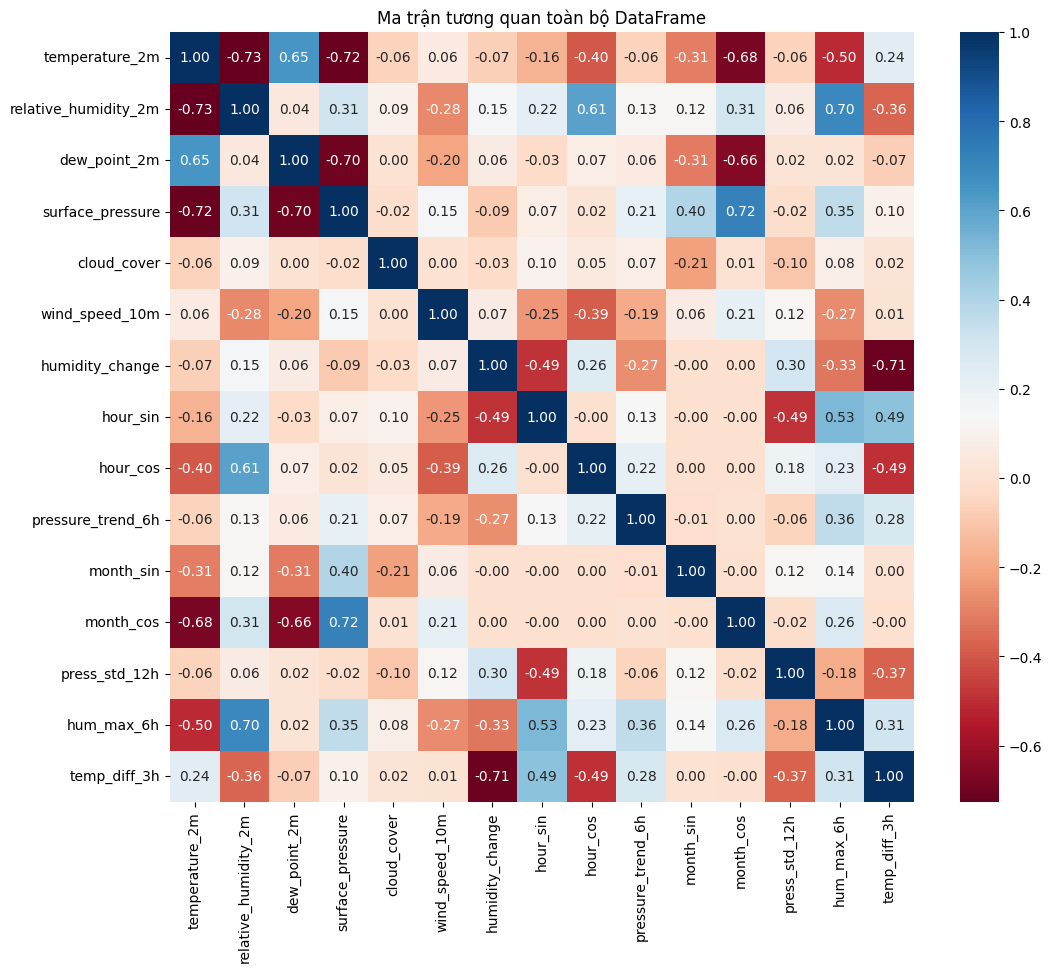

In [251]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tạo figure
plt.figure(figsize=(12, 10))
dr = d.drop(columns=['weather_group'])
# Vẽ heatmap cho tất cả các cột
sns.heatmap(dr.corr(), annot=True, cmap='RdBu', fmt=".2f")

# Tiêu đề
plt.title("Ma trận tương quan toàn bộ DataFrame")

# Hiển thị
plt.show()
